In [47]:
# Langevin Simulation of Brownian motion in 2D
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Parameters
m = 1.0
gamma = 1.0
k = .001           # <-- Set to 0 for free Brownian motion (no trap - quite unstable, so always better to have a bit of trapping)
kB_T = 10.0         # temperature
dt = 0.01            # choose a small enough dt to have a stable simulation ... but careful, if dt is too small the simulation becomes too slow!
T_total = 100.0    # choose the length of your time interval ... it should be somehow related to the choice of your parameters ... it must be long enough to thermalize!
N_steps = int(T_total / dt)
t = np.linspace(0, T_total, N_steps)

# Arrays for position and velocity in 2D
x = np.zeros(N_steps)
y = np.zeros(N_steps)
vx = np.zeros(N_steps)
vy = np.zeros(N_steps)

# Initial conditions
x[0] = 0.0
y[0] = 0.0
vx[0] = 0.0
vy[0] = 0.0

sigma = np.sqrt(2 * gamma * kB_T / m)

Ntraj = 400
R2 = np.zeros(N_steps)
X = np.zeros(N_steps)
Y = np.zeros(N_steps)
for ntraj in range(Ntraj):
    # Langevin integration (Euler-Maruyama algorithm)
    for i in range(N_steps - 1):
        noise_x = sigma * np.sqrt(dt) * np.random.randn()
        noise_y = sigma * np.sqrt(dt) * np.random.randn()
        
        ax_ = (-gamma * vx[i] - k * x[i]) / m
        ay_ = (-gamma * vy[i] - k * y[i]) / m
        
        vx[i+1] = vx[i] + ax_ * dt + noise_x / m
        vy[i+1] = vy[i] + ay_ * dt + noise_y / m
        
        x[i+1] = x[i] + vx[i+1] * dt
        y[i+1] = y[i] + vy[i+1] * dt
    R2 += (np.square(x) + np.square(y))/Ntraj
    X += x / Ntraj
    Y += y / Ntraj


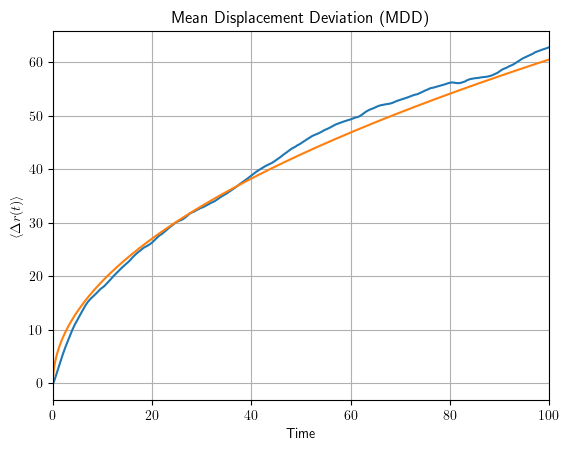

In [48]:
time = t
msd = np.sqrt( R2 - X**2 - Y**2 )
plt.plot(time, msd, label=r'$\langle x^2(t) \rangle$')
plt.xlabel('Time')
plt.ylabel(r'$\langle \Delta r (t) \rangle$')
plt.title('Mean Displacement Deviation (MDD)')
plt.grid()

# Fit a power law to the MSD
from scipy.optimize import curve_fit

def power_law(t, a):
    return a * t**.5

popt, _ = curve_fit(power_law, time[:int(len(time)/2)], msd[:int(len(time)/2)])
a_fit = popt
plt.plot(time, power_law(time, *popt) ) #, 'r--', label=f'Fit: ~ t^{b_fit:.2f}')
#plt.legend()
plt.show()

In [49]:
# Cell 2: Animate the particle
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xlim(-50, 50)
ax.set_ylim(-50, 50)
ax.set_aspect('equal')
ax.grid(True)
ax.set_title('2D Brownian Motion')

particle, = ax.plot([], [], 'ro')
trail, = ax.plot([], [], 'b-', lw=0.8)
trail_length = 200

plt.close(fig)

def init():
    particle.set_data([], [])
    trail.set_data([], [])
    return particle, trail

def update(i):
    i = min(i, N_steps-1)
    particle.set_data(x[i], y[i])
    start = max(0, i - trail_length)
    trail.set_data(x[start:i], y[start:i])
    return particle, trail

ani = FuncAnimation(fig, update, frames=np.arange(0, int(N_steps/2), 40), init_func=init,
                    interval=50, blit=True)

HTML(ani.to_jshtml())

/var/folders/y4/dpq6l9fj2kv9z0prq_6_pyy00000gn/T/ipykernel_73031/1112600126.py:22: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  particle.set_data(x[i], y[i])


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>